# Table of Contents
1. Introduction
2. Importing libraries
3. Data Preprocessing
4. Model Building (Linear Regression)
5. Model Evaluation & Cross-validation
6. Outlier detection
7. Actual vs Predicted Comparison
8. Feature Importance
9. Error Analysis
10. Summary
11. Business Insights
12. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# Check for null values
print(df.isnull().sum())

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [7]:
# Check data types
print(df.dtypes)

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


In [8]:
# Get quick statistics
print(df.describe())

           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000  


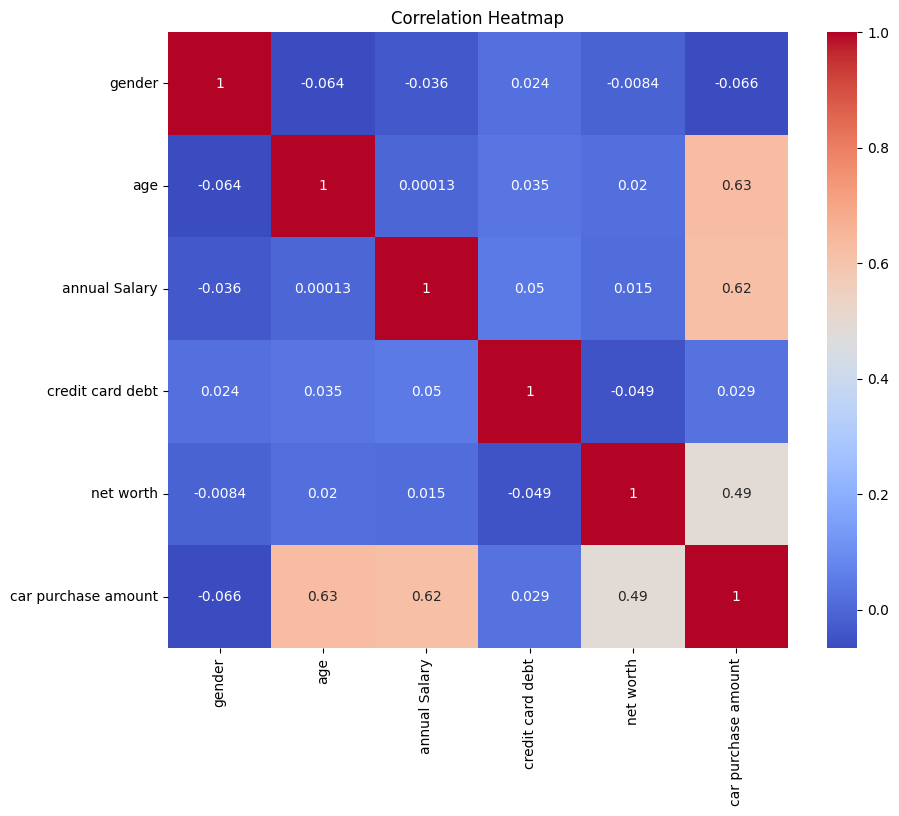

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Features
X = df.drop(['customer name', 'customer e-mail', 'country', 'car purchase amount'], axis=1)

# Target
y = df['car purchase amount']


In [12]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(400, 5) (100, 5)


In [13]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 2.0943696009477115
R-squared: 0.9999999806028682


In [15]:
# Train the model
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for both
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Calculate R-squared (R2) for both
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Training MSE: 2.199001668389649
Test MSE: 2.0943696009477115
Training R-squared: 0.9999999812764105
Test R-squared: 0.9999999806028682


In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform K-fold cross-validation
# Use negative MSE (because cross_val_score maximizes the score, but we want to minimize MSE)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Since the scores are negative, we will convert them to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Mean MSE: {mean_cv_score}")
print(f"Cross-Validation Standard Deviation of MSE: {std_cv_score}")


Cross-Validation Mean MSE: 2.2418297880937494
Cross-Validation Standard Deviation of MSE: 0.5362912932954961


In [17]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores
z_scores = np.abs(zscore(X))  # X is your feature matrix

# Identify outliers (values with Z-score > 3)
outliers = (z_scores > 3)

# Print the indices of the outliers
print(np.where(outliers))


(array([ 28,  37,  89, 315, 444]), array([2, 1, 2, 4, 1]))


In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X < lower_bound) | (X > upper_bound)

# Print the indices of the outliers
print(np.where(outliers))


(array([ 28,  37,  89, 194, 221, 236, 239, 253, 290, 315, 440, 444, 444,
       488]), array([2, 1, 2, 1, 3, 1, 3, 3, 3, 4, 3, 1, 3, 3]))


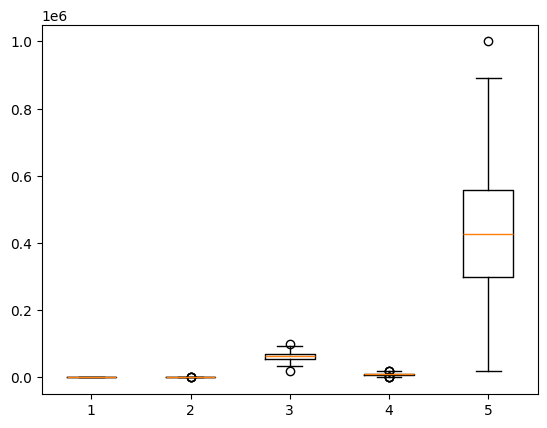

In [19]:
import matplotlib.pyplot as plt

# Plot boxplot for each feature in X
plt.boxplot(X)
plt.show()


In [21]:
#Predict on the test set
y_pred = model.predict(X_test)

#Compare actual vs predicted
import pandas as pd
comparison = pd.DataFrame({'Actual':y_test.values, 'Predicted':y_pred})
print(comparison.head(10))

        Actual     Predicted
0  46082.80993  46084.577864
1  45058.89690  45060.424126
2  63079.84329  63081.568261
3  31837.22537  31838.294520
4  60461.24268  60460.967913
5  63140.05082  63138.105866
6  52477.83479  52479.979477
7  54755.42038  54757.761309
8  52707.96816  52706.993381
9  47869.82593  47869.367910


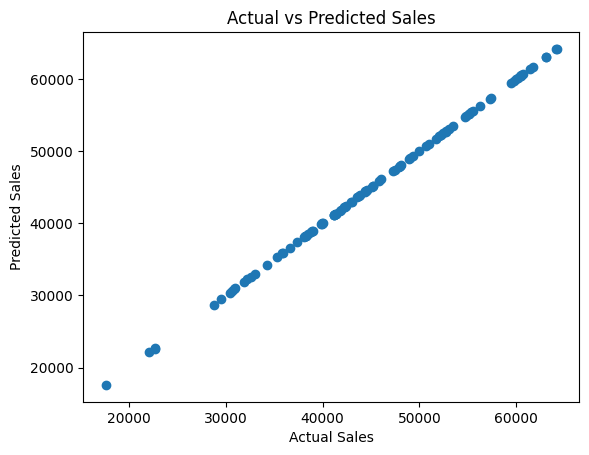

In [22]:
#Visualize actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [23]:
#check feature importance
coefficients = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : model.coef_
})

#sort features by their impact
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

            Feature  Coefficient
1               age   841.561911
2     annual Salary     0.562334
4         net worth     0.028983
3  credit card debt    -0.000024
0            gender    -0.121791


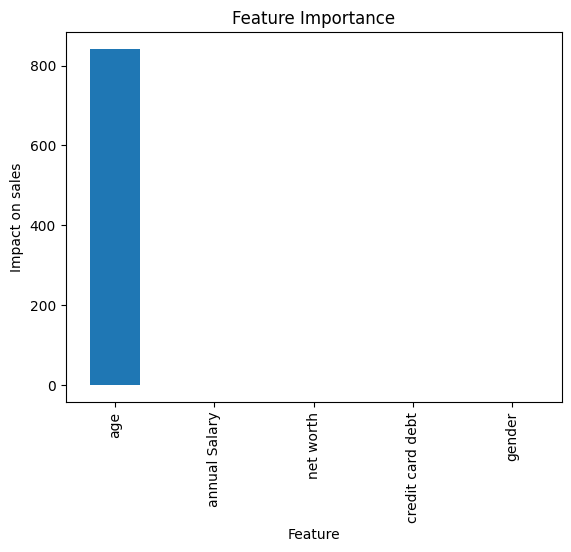

In [24]:
coefficients.plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title("Feature Importance")
plt.ylabel("Impact on sales")
plt.show()

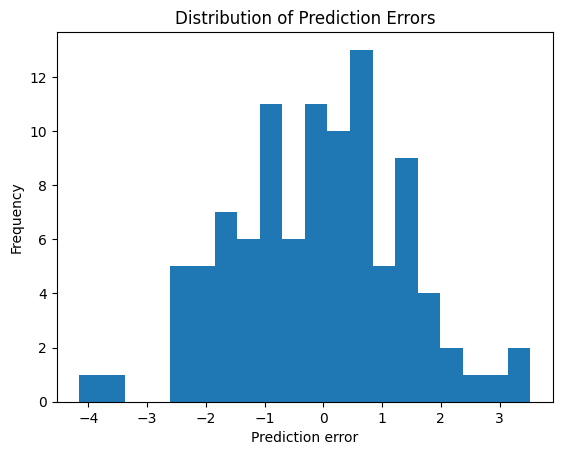

In [25]:
#error distribution
errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction error")
plt.ylabel("Frequency")
plt.show()

# Summary
In this project, we forecasted product sales using ML techniques. 
We performed data preprocessing, handled missing values, detected outliers and applied feature scaling.
A linear regression model was trained and evaluated using apt scores like MSE, R-squared and cross-validation techniques.
We analyzed the impact of different features like age, net worth, salary, credit card debt, gender on sales predictions.

# Business Insights
- **Age** is the most influential factor affecting product sales.
- **Annual Salary** also positively impacts sales, but to a lesser extent.
- **Net Worth** and **Credit Card Debit** have minimal influence on sales.
- **Gender** shows a slight negative effect but its impact is relatively small.

These insights can help businesses in:
- Targeting marketing campaigns towards age groups.
- Designing promotions for customers based on income levels.
- Reducing marketing efforts on less impactful factors. 

# Conclusion

The developed ML model provides accurate sales prediction based on customer attributes.
By understanding the key factors driving sales, businesses can optimize their marketing strategies and improve revenue growth.
Future improvements can include experimenting with more advanced models and integrating additional marketing data for even better predictions.